K means

question 1 part c

In [1]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import random
import math

In [2]:
data = [np.zeros(50) for i in range(400)]
i=0
with open('E:\ACADS STUFF\Semester 6\prml\Assignment 2\A2Q1.csv') as file:    
    csv_reader = csv.reader(file)    
    for row in csv_reader:   
        data[i] = row
        i+=1


In [3]:
data = np.array(data, dtype=np.float64)

In [4]:
cluster_means = []
num_clusters =4

random_numbers = [random.randint(0, len(data)) for _ in range(num_clusters)]
for k in range(len(random_numbers)):
    cluster_means.append(data[random_numbers[k]])



In [5]:
def initial_assignment(data):
    z = [-1 for i in range(len(data))]
    for i in range(0,len(z)):
        z[i] = random.randint(0, 3)
    return z

In [6]:
def means_calc(data,z):
    s=[[0 for i in range(0,50)] for i in range(0,4)]
    num = [0 for i in range(0,4)]
    for i in range(len(z)):
        cluster = z[i]
        num[cluster]+=1
        #print(data[i])
        s[cluster] = [x+y for x,y in zip(s[cluster],data[i])]
    for i in range(len(s)):
        for j in range(len(s[i])):
            s[i][j] = s[i][j] / num[i]
    return s
        

In [7]:
def reassigner(data,cluster_means,z):
    for i in range(0,len(data)):
        for k in range(4):
            if  np.linalg.norm(data[i] - cluster_means[k]) < np.linalg.norm(data[i] - cluster_means[z[i]]):
                z[i] = k
    return z

In [8]:
def score_calc(data,z,means):
    score = 0
    for i in range(len(data)):
        score += np.linalg.norm(data[i] - means[z[i]])
    return score

In [9]:
z = initial_assignment(data)
means = means_calc(data,z)

count = 0
score_list = []
iteration = 0
while True:
    score = score_calc(data,z,means)
    print("Iteration",iteration+1,"objective",score)
    iteration = iteration+1
    score_list.append(score)
    znew = reassigner(data,means,z)
    if znew == z :
        count +=1
    if count > 30:
        break
    z= znew
    means =  means_calc(data,z)



Iteration 1 objective 939.6161137830267
Iteration 2 objective 833.1401500347334
Iteration 3 objective 821.6183102901697
Iteration 4 objective 820.6149620035692
Iteration 5 objective 820.379566082372
Iteration 6 objective 820.0925305182499
Iteration 7 objective 819.8066017186806
Iteration 8 objective 819.5375502607751
Iteration 9 objective 819.3616491281736
Iteration 10 objective 819.3113209573042
Iteration 11 objective 819.2762894622942
Iteration 12 objective 819.2762894622942
Iteration 13 objective 819.2762894622942
Iteration 14 objective 819.2762894622942
Iteration 15 objective 819.2762894622942
Iteration 16 objective 819.2762894622942
Iteration 17 objective 819.2762894622942
Iteration 18 objective 819.2762894622942
Iteration 19 objective 819.2762894622942
Iteration 20 objective 819.2762894622942
Iteration 21 objective 819.2762894622942
Iteration 22 objective 819.2762894622942
Iteration 23 objective 819.2762894622942
Iteration 24 objective 819.2762894622942
Iteration 25 objective 819

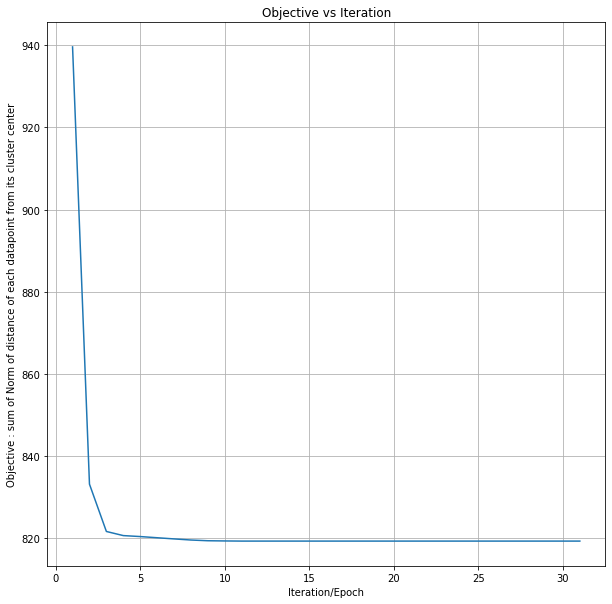

In [10]:
plt.figure(figsize=(10, 10))
plt.title('Objective vs Iteration')
plt.plot(np.arange(1, len(score_list)+ 1), score_list)
plt.xlabel('Iteration/Epoch')
plt.ylabel('Objective : sum of Norm of distance of each datapoint from its cluster center')
plt.grid(True)
plt.show()